<a href="https://colab.research.google.com/gist/Melvinchen0404/29d789c8168ea2c24ce267fdd2657bb0/sudoku_problem_generator_-_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1**: Access this link to Sudoku puzzles: https://raw.githubusercontent.com/asweigart/PythonStdioGames/master/src/gamesbyexample/sudokupuzzles.txt

**STEP 2**: Save the .txt file as "sudokupuzzles.txt"

**STEP 3**: Upload the saved file to this Colab session

**STEP 4**: Pick a random string from this file as a Sudoku puzzle to be solved

**STEP 5**: Convert this random string (representing a Sudoku puzzle to be solved) into a list of integers that can be mapped onto a 9-by-9 Sudoku grid

In [ ]:
import random
import numpy as np

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

string = random.choice(list(open('sudokupuzzles.txt')))
a_string = string.replace(".", "0")
b_string = a_string.replace("\n","")
new_list = list(map(int, b_string))
print(color.BOLD + 'RANDOM STRING REPRESENTING SUDOKU PUZZLE TO BE SOLVED \n' + color.END)
print(string)
print(color.BOLD + 'LIST VERSION OF RANDOM STRING \n' + color.END)
print(new_list) 

RANDOM STRING REPRESENTING SUDOKU PUZZLE TO BE SOLVED 

...1254....84.....42.8......3.....95.6.9.2.1.51.....6......3.49.....72....1298...

LIST VERSION OF RANDOM STRING 

[0, 0, 0, 1, 2, 5, 4, 0, 0, 0, 0, 8, 4, 0, 0, 0, 0, 0, 4, 2, 0, 8, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 9, 5, 0, 6, 0, 9, 0, 2, 0, 1, 0, 5, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 4, 9, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 1, 2, 9, 8, 0, 0, 0]


**STEP 6**: Convert the 1D list of integers into a 2D array (or a 9-by-9 Sudoku grid)

In [ ]:
arr = np.array(new_list)
arr_2d = np.reshape(arr, (9, 9))
print(arr_2d)

[[0 0 0 1 2 5 4 0 0]
 [0 0 8 4 0 0 0 0 0]
 [4 2 0 8 0 0 0 0 0]
 [0 3 0 0 0 0 0 9 5]
 [0 6 0 9 0 2 0 1 0]
 [5 1 0 0 0 0 0 6 0]
 [0 0 0 0 0 3 0 4 9]
 [0 0 0 0 0 7 2 0 0]
 [0 0 1 2 9 8 0 0 0]]


**STEP 7 (OPTIONAL)**: Solve the random Sudoku puzzle manually if you wish \
a) The 2D array is organized as a matrix with 9 columns (1-9) and 9 rows (A-I). These correspond to the 9 columns and rows of a Sudoku puzzle; \
b) The Sudoku puzzle leaves some squares filled and some squares empty; \
c) Convert the 2D array into a 9-by-9 Sudoku grid. The characters 1-9 represent digits in a filled square while the character 0 represents an empty square. Here is an example of a 2D array that has been converted into a 9-by-9 Sudoku grid: 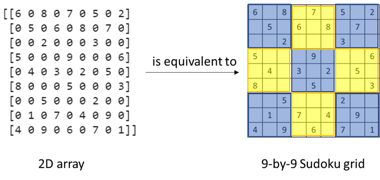; \
d) No digit can appear twice in each column, row, or 3-by-3 subgrid and every digit must appear once. A Sudoku puzzle is solved iff the 9-by-9 grid is filled with digits such that each column, row, and 3-by-3 subgrid contains all the digits from 1-9; \
e) The minimum number of filled squares (or clues) for a **unique solution** to a Sudoku puzzle is 17. A brute-force search method (McGuire *et al*, 2013) has demonstrated that there can be no unique solution for 16 or fewer clues. See the following links: \
i) https://www.technologyreview.com/2012/01/06/188520/mathematicians-solve-minimum-sudoku-problem/ \
ii) https://arxiv.org/pdf/1201.0749.pdf \
f) Time yourself when you solve the puzzle manually and compare how long it takes for *this* program to solve the same puzzle with the next step \
**STEP 8**: Solve the random Sudoku puzzle automatically by running the final code cell below

In [ ]:
def backtrack_solve(arr_2d):
    	
    	find = find_empty(arr_2d) 
    
    
    	if find is None:
    		return True
    	else:
    		row, col = find
    
    	for i in range(1, 10):
    		if is_valid(arr_2d, i, (row, col)):
    			arr_2d[row][col] = i
    			
    			if backtrack_solve(arr_2d):
    				return True
    
    			arr_2d[row][col] = 0
    	
    	return False	

def is_valid(arr_2d, num, position):
    	
    	# To check rows (A-I)
    	for i in range(len(arr_2d[0])):
    		if arr_2d[position[0]][i] == num and position[1] != i:
    			return False
    	
    	# To check columns (1-9)
    	for i in range(len(arr_2d)):
    		if arr_2d[i][position[1]] == num and position[0] != i:
    			return False
    
    	# To check 3-by-3 subgrids
    	square_x = position[1] // 3
    	square_y = position[0] // 3
    
    	for i in range(square_y * 3, square_y* 3 + 3):
    		for j in range(square_x * 3, square_x* 3 + 3):
    			if arr_2d[i][j] == num and (i, j) != position:
    				return False
    
    	return True

def print_arr_2d(arr_2d):
    	for i in range(len(arr_2d)):
    		if i % 3 == 0 and i != 0:
    			print("------------------------")
    		for j in range(len(arr_2d[0])):
    			if j % 3 == 0 and j != 0:
    				print(" | ", end="")
    			if j == 8:
    				print(arr_2d[i][j])
    			else:
    				print(arr_2d[i][j], end=" ")	

def find_empty(arr_2d):
    	for i in range(len(arr_2d)):
    		for j in range(len(arr_2d[0])):
    			if arr_2d[i][j] == 0:
    				return (i, j)
    	return None	

print(color.BOLD + 'INPUT (PROBLEM) \n' + color.END)
print_arr_2d(arr_2d)
backtrack_solve(arr_2d)
print('─' * 70 + '\n' + color.BOLD + 'OUTPUT (SOLUTION) \n' + color.END)
print_arr_2d(arr_2d)

INPUT (PROBLEM) 

0 0 0  | 1 2 5  | 4 0 0
0 0 8  | 4 0 0  | 0 0 0
4 2 0  | 8 0 0  | 0 0 0
------------------------
0 3 0  | 0 0 0  | 0 9 5
0 6 0  | 9 0 2  | 0 1 0
5 1 0  | 0 0 0  | 0 6 0
------------------------
0 0 0  | 0 0 3  | 0 4 9
0 0 0  | 0 0 7  | 2 0 0
0 0 1  | 2 9 8  | 0 0 0
──────────────────────────────────────────────────────────────────────
OUTPUT (SOLUTION) 

9 7 6  | 1 2 5  | 4 3 8
1 5 8  | 4 3 6  | 9 2 7
4 2 3  | 8 7 9  | 1 5 6
------------------------
2 3 4  | 7 6 1  | 8 9 5
8 6 7  | 9 5 2  | 3 1 4
5 1 9  | 3 8 4  | 7 6 2
------------------------
7 8 2  | 5 1 3  | 6 4 9
3 9 5  | 6 4 7  | 2 8 1
6 4 1  | 2 9 8  | 5 7 3
